In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829


In [3]:
train.shape

(87864, 9)

In [4]:
train.isnull().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
Sales                   0
dtype: int64

In [5]:
test = pd.read_csv('test.csv')
test.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type
0,DRM23,10.156725,Snack Foods,119.319482,OUT013,1999,High,Tier 3
1,FDG47,10.434425,Household,263.600449,OUT018,1987,High,Tier 3
2,FDN21,11.953589,Health and Hygiene,246.286990,OUT018,1997,High,Tier 1
3,FDZ23,14.948546,Dairy,136.200508,OUT046,2004,Medium,Tier 2
4,FDC16,11.080042,Canned,173.145664,OUT018,2009,Medium,Tier 3


In [6]:
test.shape

(37656, 8)

In [7]:
test.isnull().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
dtype: int64

In [8]:
train['Item_Type'].value_counts()

Baking Goods             14666
Fruits and Vegetables    14328
Meat                      8099
Snack Foods               7817
Household                 6018
Soft Drinks               5396
Frozen Foods              5129
Canned                    4565
Dairy                     3807
Others                    3688
Breads                    3509
Hard Drinks               3129
Health and Hygiene        2995
Starchy Foods             2974
Seafood                   1107
Breakfast                  637
Name: Item_Type, dtype: int64

In [9]:
train['Outlet_ID'].value_counts()

OUT035    24071
OUT046    20850
OUT018    17156
OUT049    13356
OUT013    12431
Name: Outlet_ID, dtype: int64

In [10]:
train['Outlet_ID'] = train['Outlet_ID'].str[-2:]
test['Outlet_ID'] = test['Outlet_ID'].str[-2:]

In [11]:
train['Outlet_ID'] = train['Outlet_ID'].astype(int)
test['Outlet_ID'] = test['Outlet_ID'].astype(int)

In [12]:
train['Outlet_Year'].value_counts()

1997    16916
2004    15197
2009    13662
1999    13046
1987    10357
1996     4684
2003     4622
2008     4106
1998     3798
1988     1440
2007       20
2005       16
Name: Outlet_Year, dtype: int64

In [13]:
train['Outlet_Size'].value_counts()

Small     48614
Medium    26683
High      12567
Name: Outlet_Size, dtype: int64

In [14]:
train['Outlet_Location_Type'].value_counts()

Tier 1    33567
Tier 3    29044
Tier 2    25253
Name: Outlet_Location_Type, dtype: int64

In [15]:
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].str[-1:]
test['Outlet_Location_Type'] = test['Outlet_Location_Type'].str[-1:]

In [16]:
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].astype(int)
test['Outlet_Location_Type'] = test['Outlet_Location_Type'].astype(int)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87864 entries, 0 to 87863
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_ID               87864 non-null  object 
 1   Item_W                87864 non-null  float64
 2   Item_Type             87864 non-null  object 
 3   Item_MRP              87864 non-null  float64
 4   Outlet_ID             87864 non-null  int32  
 5   Outlet_Year           87864 non-null  int64  
 6   Outlet_Size           87864 non-null  object 
 7   Outlet_Location_Type  87864 non-null  int32  
 8   Sales                 87864 non-null  float64
dtypes: float64(3), int32(2), int64(1), object(3)
memory usage: 5.4+ MB


In [18]:
newtrain = train.copy()
newtest = test.copy()

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
x = ['Item_ID', 'Item_Type']
for i in x:
    newtrain[i] = le.fit_transform(newtrain[i])
    newtest[i] = le.fit_transform(newtest[i])

In [21]:
newtrain = pd.get_dummies(newtrain)
newtest = pd.get_dummies(newtest)

In [22]:
newtrain.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Location_Type,Sales,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,573,21.027499,0,197.352319,46,2004,2,2689.457781,0,0,1
1,861,21.102371,10,148.250214,35,1987,1,3437.350375,0,0,1
2,615,20.882263,7,205.465010,35,1999,3,3129.967268,0,0,1
3,299,21.050435,15,253.417583,46,1996,1,1306.514376,0,0,1
4,218,21.247876,0,240.871039,35,1988,3,1739.769829,0,0,1


In [23]:
newtest.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Location_Type,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,73,10.156725,13,119.319482,13,1999,3,1,0,0
1,237,10.434425,9,263.600449,18,1987,3,1,0,0
2,376,11.953589,8,246.286990,18,1997,1,1,0,0
3,709,14.948546,4,136.200508,46,2004,2,0,1,0
4,143,11.080042,3,173.145664,18,2009,3,0,1,0


In [24]:
x = newtrain.drop('Sales', axis = 1)
y = newtrain['Sales']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1276.9500269951427


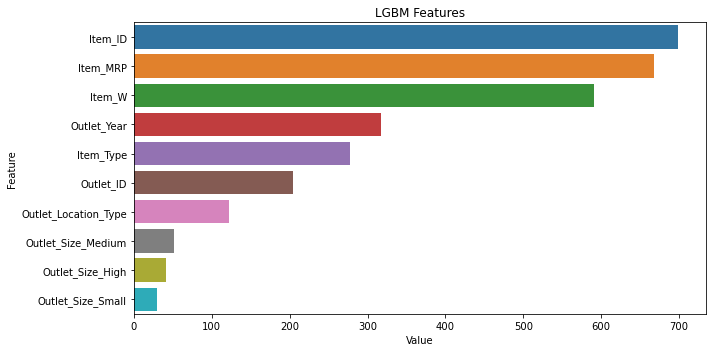

In [28]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LGBM Features')
plt.tight_layout()
plt.show()

In [29]:
x_train = newtrain.drop(['Outlet_Size_Small', 'Sales', 'Outlet_Size_High', 'Outlet_Size_Medium'], axis = 1)
y_train = newtrain['Sales']
x_test = newtest.drop(['Outlet_Size_Small', 'Outlet_Size_High', 'Outlet_Size_Medium'], axis = 1)

In [30]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)

In [31]:
solution = pd.DataFrame({'Sales' : y_pred})
solution.to_csv('Solution.csv', index = False)